<a href="https://colab.research.google.com/github/Rukaya-lab/Tensorflow-practice/blob/main/Tf_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns

In [70]:
# loading data directly from a github page.

boston_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv" )

In [71]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


In [72]:
boston_data.isnull().sum().sum()

0

In [73]:
column = boston_data.columns
column

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

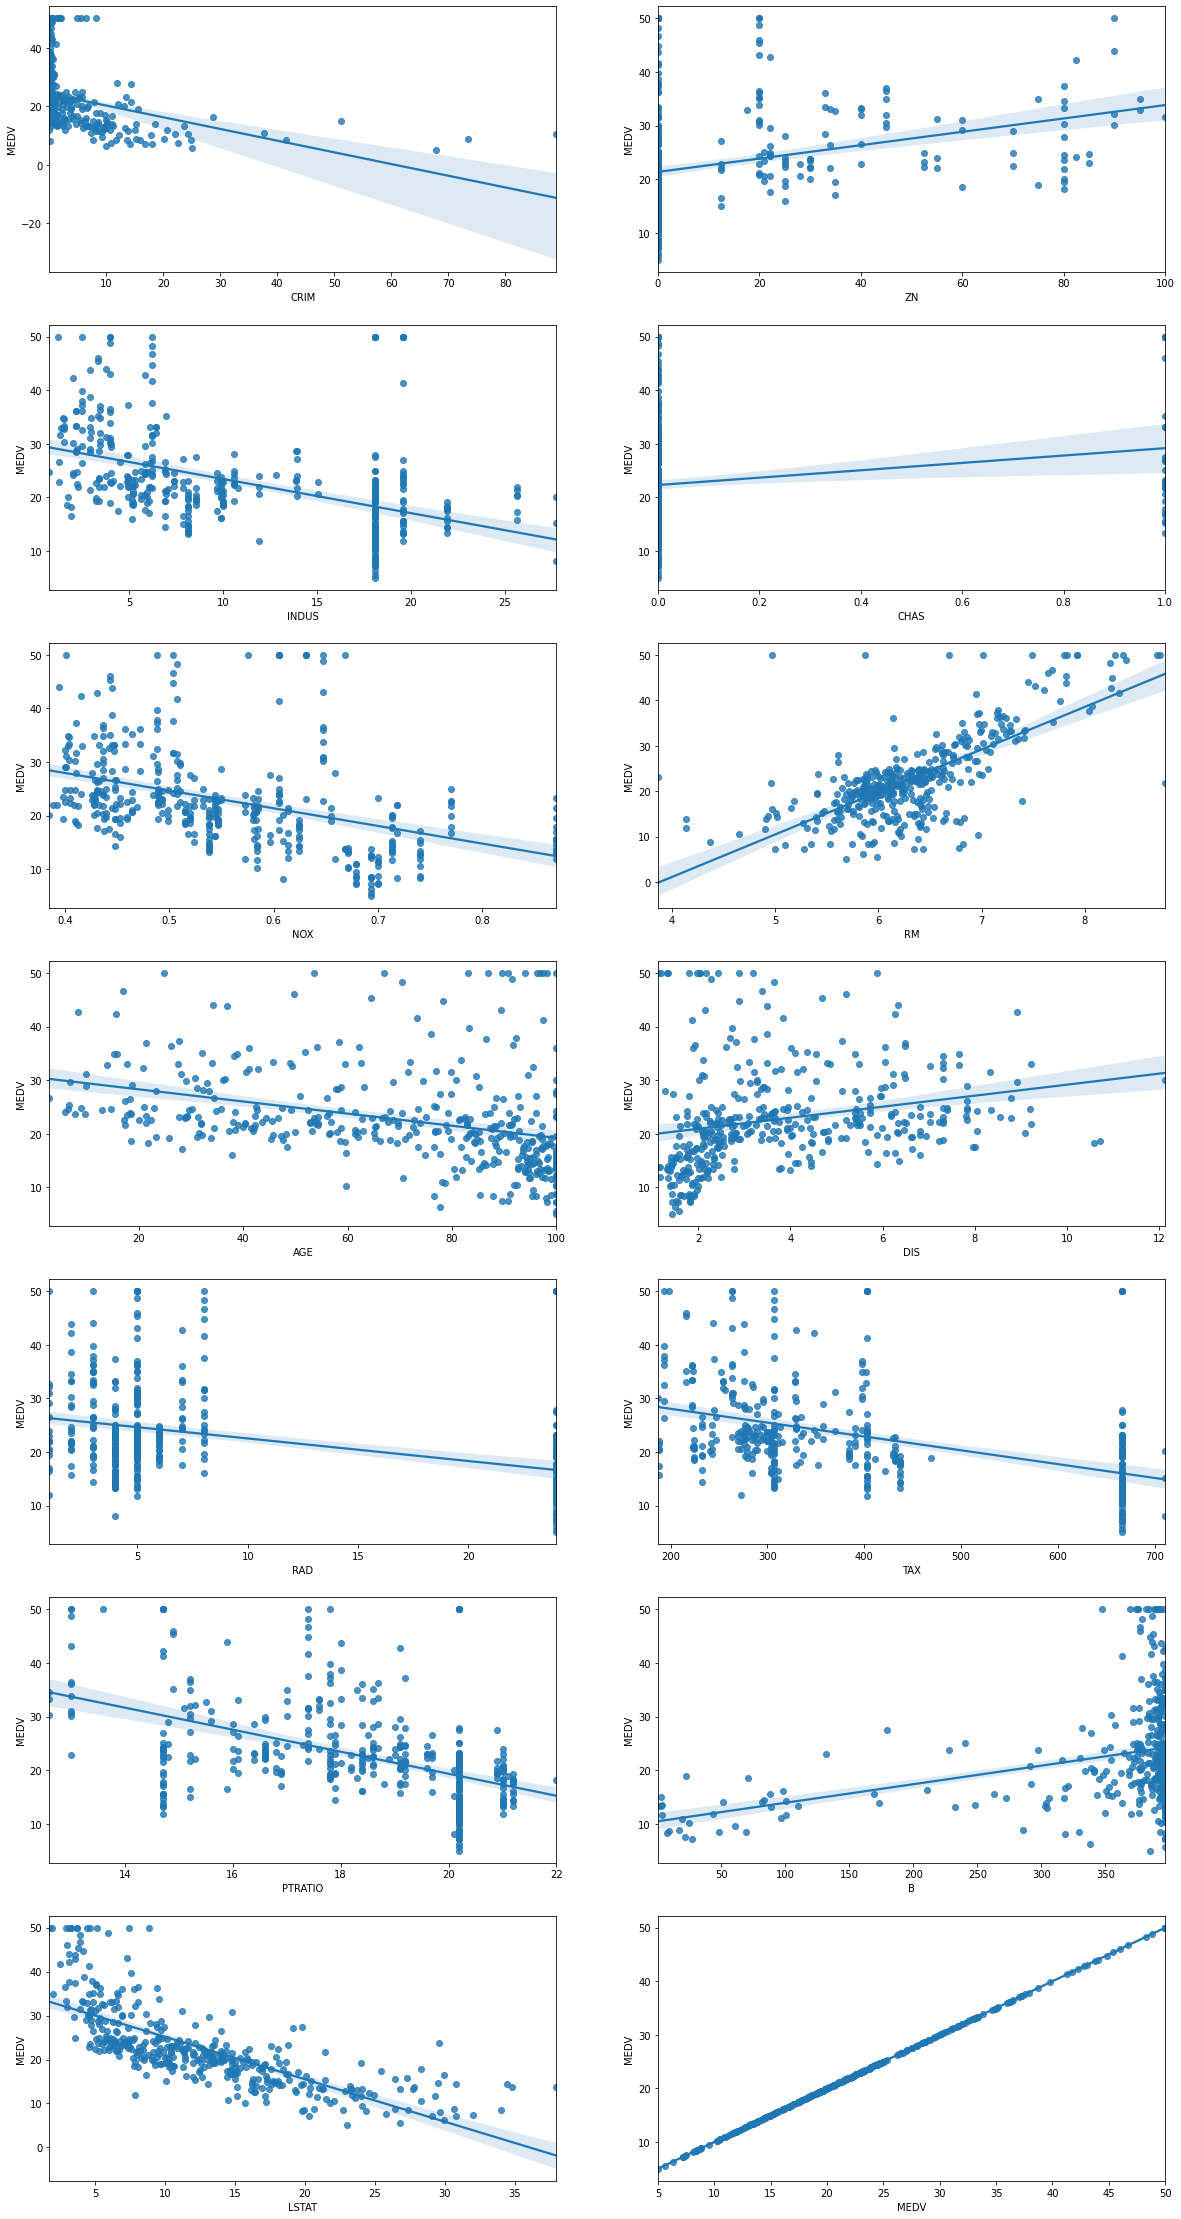

In [74]:
fig, ax = plt.subplots(7, 2, figsize=(20, 40))
ax = ax.flatten()


for k, col in enumerate(column):
  sns.regplot(x= boston_data[col], y= boston_data['MEDV'], ax= ax[k])


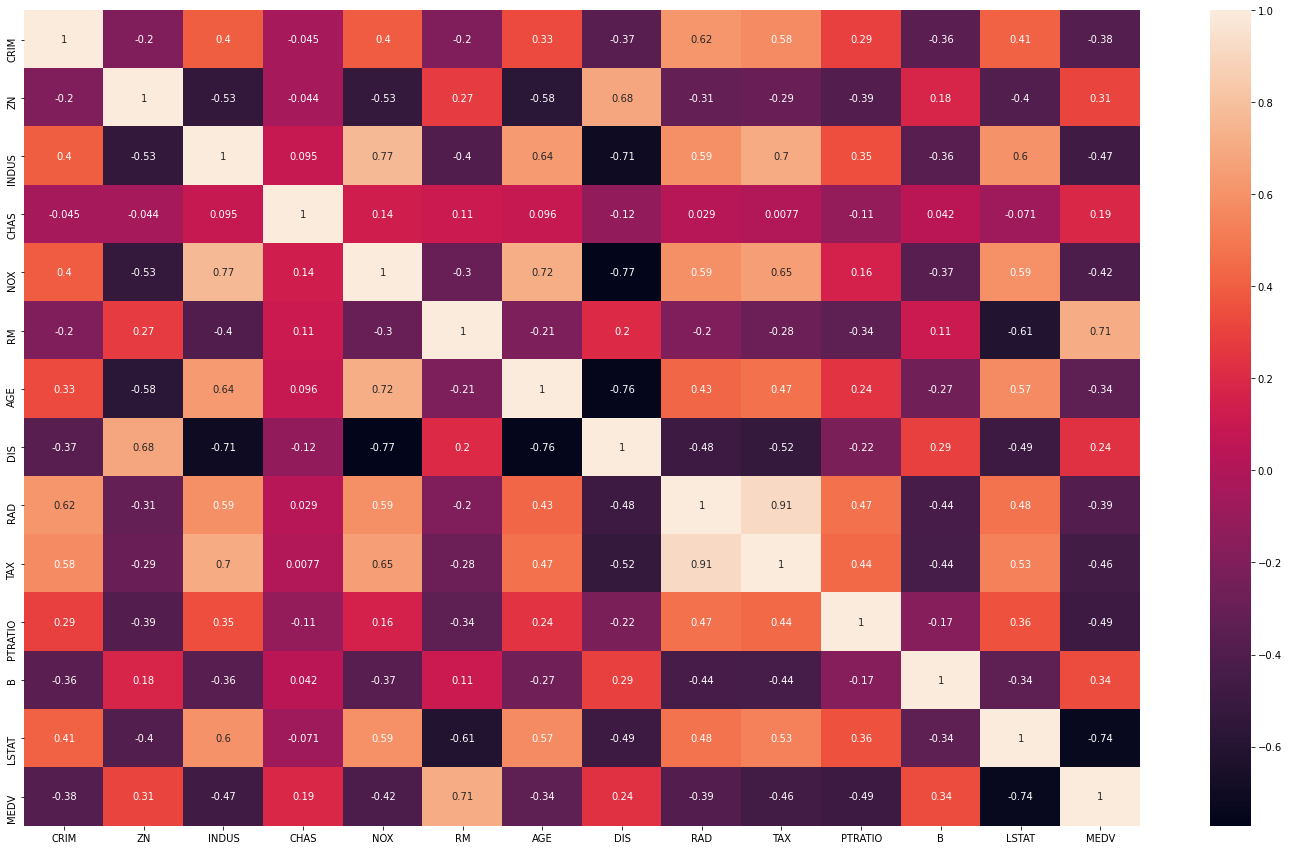

In [75]:
plt.figure(figsize= (25,15))

sns.heatmap(boston_data.corr(), annot= True)


In [76]:
X= boston_data.drop('MEDV', axis= 1)
y= boston_data['MEDV']

In [77]:
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Define the Model**

##### Sequential API for deep Learning (simplest)

In [78]:
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.

In [79]:
n_features = X.shape[1]
n_features

13

In [80]:
model = Sequential()
model.add(Dense(10, activation= 'relu', input_shape= (n_features,  )))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))

In [81]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
None


### **Compile the Model**

Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy.
It also requires that you select an algorithm to perform the optimization procedure. We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. It’s one of the most popular gradient descent optimization algorithms for deep learning networks. RMSprop is an optimizer that’s reliable and fast.

In [82]:
# import RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)    # 0.01 is the learning rate

In [83]:
model.compile(loss= 'mean_squared_error', optimizer= optimizer)

### Fitting the Model

In [84]:
print(X_train.shape)
print(y_train.shape)

(323, 13)
(323,)


In [85]:
import random
np.random.seed(1234)

tf.random.set_seed(1234)

history= model.fit(X_train, y_train, batch_size= 30, epochs= 10, verbose= 1)


Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 2825.7680
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 181.0306
Epoch 3/10
11/11 [==============================] - 0s 1ms/step - loss: 208.8813
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 98.2664
Epoch 5/10
11/11 [==============================] - 0s 1ms/step - loss: 182.4324
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 109.4335
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 165.7917
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 95.6443
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 138.8832
Epoch 10/10
11/11 [==============================] - 0s 2ms/step - loss: 96.8745


### Evaluate the Model with the test data

In [86]:
predicted= model.predict(X_test)


In [87]:
testing= model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 62.6524


### Hyper Parameter Tuning

#### Parameters to tune are learning rate, number of epoch, batchsize.

The hyper parameter can be manually tested by changing either of the parameter to several other values until the right one is gotten

In [88]:
# changing the learning rate from 0.01 to 0.1 and evaluate hoe the model performs on the test data

optimizer = RMSprop(0.1)    # 0.1 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model

# fit the model 
model.fit(X_train, y_train, epochs=10, batch_size=30, verbose = 1)

# evaluate the model
print('The MSE value is: ', model.evaluate(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 0s 1ms/step - loss: 459167.0228
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 3925.3431
Epoch 3/10
11/11 [==============================] - 0s 1ms/step - loss: 1096.4775
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 354.1460
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 225.7279
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 187.4722
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 154.3689
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 171.9042
Epoch 9/10
11/11 [==============================] - 0s 1ms/step - loss: 117.5076
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 302.9387
The MSE value is:  302.938720703125


In [89]:
# changing the epoch to 100 with learning rate of 0.1 and evaluate hoe the model performs on the test data

optimizer = RMSprop(0.1)    # 0.1 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model

# fit the model 
model.fit(X_train, y_train, epochs=100, batch_size=30, verbose = 1)

# evaluate the model
print('The MSE value is: ', model.evaluate(X_test, y_test))

Epoch 1/100
11/11 [==============================] - 0s 1ms/step - loss: 32806.4258
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 247.7126
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 100.5295
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 74.5396
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 59.5895
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: 69.6358
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: 86.6821
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 124.5900
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 276.6328
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 202.0396
Epoch 11/100
11/11 [==============================] - 0s 1ms/step - loss: 122.5801
Epoch 12/100
11/11 [==============================] - 0s 1ms/step - loss: 91.3042
Epoch 13/100
11/

### Tuning the Parameters directly with GridSearchCV from sklearn library

In [90]:
# Import the GridSearchCV class
from sklearn.model_selection import GridSearchCV

In [91]:
# 1. Define the model's architecture
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
optimizer = RMSprop(0.1)    # 0.1 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model

# 2. Define the hyperparameters grid to be validated
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size= batch_size, epochs=  epochs)
grid = GridSearchCV(estimator= model, param_grid=param_grid, scoring= 'neg_mean_squared_error', n_jobs=-1)


Fitting the grid directly will shoot and error, so we have to use a keras wrapper.

In [111]:
# ----------------------------- Functional Tuning - Option 1: using Sklearn  ------------------------------
# Goal: tune the batch size and epochs

# Import KerasRegressor class
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn=create_model, verbose=1)


In [114]:
# Define the model through a user-defined function
def create_model(optimizer=RMSprop(0.01)):
  model = Sequential()
  model.add(Dense(10, activation='relu', input_shape=(n_features,)))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse', metrics=['mse'], optimizer=optimizer)    # compile the model
  return model



In [115]:
grid = GridSearchCV(estimator= model, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the GridSearchCV process
grid_result = grid.fit(X_train, y_train, verbose = 1)

# Print the results of the best model
print('Best params: ' + str(grid_result.best_params_))

Epoch 1/100
33/33 [==============================] - 0s 1ms/step - loss: 300.8037 - mse: 300.8037
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 127.9567 - mse: 127.9567
Epoch 3/100
33/33 [==============================] - 0s 1ms/step - loss: 101.9314 - mse: 101.9314
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: 101.7980 - mse: 101.7980
Epoch 5/100
33/33 [==============================] - 0s 1ms/step - loss: 62.0291 - mse: 62.0291
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: 91.6598 - mse: 91.6598
Epoch 7/100
33/33 [==============================] - 0s 1ms/step - loss: 66.0127 - mse: 66.0127
Epoch 8/100
33/33 [==============================] - 0s 1ms/step - loss: 53.1287 - mse: 53.1287
Epoch 9/100
33/33 [==============================] - 0s 1ms/step - loss: 60.1200 - mse: 60.1200
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 54.9891 - mse: 54.9891
Epoch 11/100
33/33 [===========

In [99]:
# Import the cross validation evaluator
from sklearn.model_selection import cross_val_score

# Measure the model's performance
results = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print('Results: \n  * Mean:', -results.mean(), '\n  * Std:', results.std())

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 809.6025 - mse: 809.6025
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 120.6972 - mse: 120.6972
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 80.7538 - mse: 80.7538
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 93.2767 - mse: 93.2767
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 64.3764 - mse: 64.3764
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 105.2701 - mse: 105.2701
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 83.6629 - mse: 83.6629
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 55.2960 - mse: 55.2960
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 123.3471 - mse: 123.3471
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 54.1301 - mse: 54.1301
Epoch 11/100
7/7 [==============================] -

### Tuning with Keras

In [103]:
# Goal: tune the learning rate

# 0. Install and import all the packages needed
!pip install -q -U keras-tuner
import kerastuner as kt

# 1. Define the general architecture of the model through a creation user-defined function
def model_builder(hp):
  model = Sequential()
  model.add(Dense(10, activation='relu', input_shape=(n_features,)))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4]) # Tuning the learning rate (four different values to test: 0.1, 0.01, 0.001, 0.0001)
  optimizer = RMSprop(learning_rate = hp_learning_rate)                            # Defining the optimizer
  model.compile(loss='mse',metrics=['mse'], optimizer=optimizer)                   # Compiling the model 
  return model                                                                     # Returning the defined model

# 2. Define the hyperparameters grid to be validated
tuner_rs = kt.RandomSearch(
              model_builder,                # Takes hyperparameters (hp) and returns a Model instance
              objective = 'mse',            # Name of model metric to minimize or maximize
              seed = 42,                    # Random seed for replication purposes
              max_trials = 5,               # Total number of trials (model configurations) to test at most. Note that the oracle may interrupt the search before max_trial models have been tested.
              directory='random_search')    # Path to the working directory (relative).



INFO:tensorflow:Reloading Oracle from existing project random_search/untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from random_search/untitled_project/tuner0.json


In [104]:
# 3. Run the GridSearchCV process
tuner_rs.search(X_train, y_train, epochs=10,validation_split=0.2,  verbose=1)

INFO:tensorflow:Oracle triggered exit


In [105]:
# 4.2. Print the results of the best model
best_model = tuner_rs.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 110.9609 - mse: 110.9609


[114.21349334716797, 114.21349334716797]

In [106]:
# 4.3. Print the best model's architecture
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


### predict on new data

In [107]:
new_test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Testing_set_boston.csv')

In [118]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
optimizer = RMSprop(0.01)    # 0.01 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer) 

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose = 1)



new_predictions= model.predict(new_test_data)
new_predictions

Epoch 1/100
33/33 [==============================] - 0s 1ms/step - loss: 1834.5478
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 233.7060
Epoch 3/100
33/33 [==============================] - 0s 989us/step - loss: 170.2359
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: 167.4566
Epoch 5/100
33/33 [==============================] - 0s 940us/step - loss: 101.6820
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: 120.9630
Epoch 7/100
33/33 [==============================] - 0s 922us/step - loss: 93.2638
Epoch 8/100
33/33 [==============================] - 0s 992us/step - loss: 77.3379
Epoch 9/100
33/33 [==============================] - 0s 933us/step - loss: 82.0077
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 73.2285
Epoch 11/100
33/33 [==============================] - 0s 954us/step - loss: 68.6441
Epoch 12/100
33/33 [==============================] - 0s 1ms/step - loss: 69.4737
Epoch 

array([[27.02495  ],
       [42.824085 ],
       [23.009005 ],
       [25.771143 ],
       [19.390617 ],
       [19.288515 ],
       [17.925833 ],
       [16.631168 ],
       [23.223137 ],
       [19.786835 ],
       [18.837    ],
       [17.716486 ],
       [ 7.0639734],
       [20.483536 ],
       [19.640171 ],
       [22.374228 ],
       [17.20234  ],
       [ 9.588792 ],
       [45.1435   ],
       [18.77883  ],
       [26.573963 ],
       [27.09434  ],
       [14.377144 ],
       [21.564856 ],
       [18.708326 ],
       [16.946503 ],
       [22.448593 ],
       [17.120695 ],
       [18.676912 ],
       [20.04143  ],
       [19.160295 ],
       [25.72611  ],
       [32.792202 ],
       [27.870783 ],
       [14.415333 ],
       [14.126332 ],
       [35.650536 ],
       [21.901487 ],
       [19.8458   ],
       [22.368431 ],
       [18.033495 ],
       [34.904305 ],
       [46.298714 ],
       [20.798262 ],
       [24.286392 ],
       [19.726048 ],
       [15.434738 ],
       [23.91

The best parameter values are gotten after tuning and then used to predict an unseen data.